In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [2]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

In [7]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

In [20]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# round z_tmp,y the values to 3 decimal places
z_tmp = np.round(z_tmp, 3)
y = np.round(y, 3)
print(z_tmp)
print(y)

# make 2 columns of z_tmp and y
# print the 2 columns side by side
# code here
z_tmp = z_tmp.reshape(-1,1) 
y = y.reshape(-1,1)
print(np.hstack((z_tmp,y)))



[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
[0.    0.    0.    0.001 0.002 0.007 0.018 0.047 0.119 0.269 0.5   0.731
 0.881 0.953 0.982 0.993 0.998 0.999 1.    1.    1.   ]
[[-1.00e+01  0.00e+00]
 [-9.00e+00  0.00e+00]
 [-8.00e+00  0.00e+00]
 [-7.00e+00  1.00e-03]
 [-6.00e+00  2.00e-03]
 [-5.00e+00  7.00e-03]
 [-4.00e+00  1.80e-02]
 [-3.00e+00  4.70e-02]
 [-2.00e+00  1.19e-01]
 [-1.00e+00  2.69e-01]
 [ 0.00e+00  5.00e-01]
 [ 1.00e+00  7.31e-01]
 [ 2.00e+00  8.81e-01]
 [ 3.00e+00  9.53e-01]
 [ 4.00e+00  9.82e-01]
 [ 5.00e+00  9.93e-01]
 [ 6.00e+00  9.98e-01]
 [ 7.00e+00  9.99e-01]
 [ 8.00e+00  1.00e+00]
 [ 9.00e+00  1.00e+00]
 [ 1.00e+01  1.00e+00]]


In [29]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

z_tmp = np.arange(0,5,1)
print(z_tmp)
# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

[0 1 2 3 4]


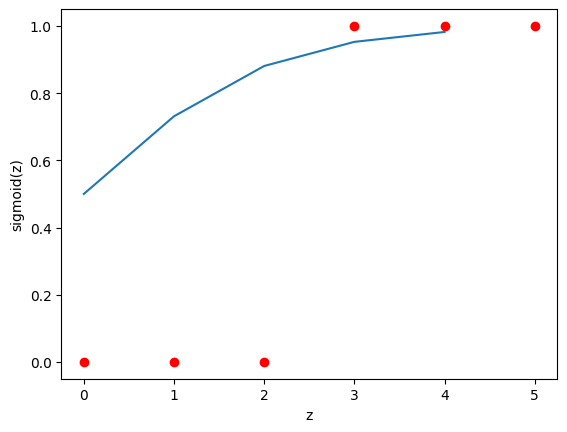

In [28]:
# plot the sigmoid function
plt.scatter(x_train, y_train, c='r')
plt.plot(z_tmp, y)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')  
plt.show()

# scatter plot of the training data


In [30]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost

In [31]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

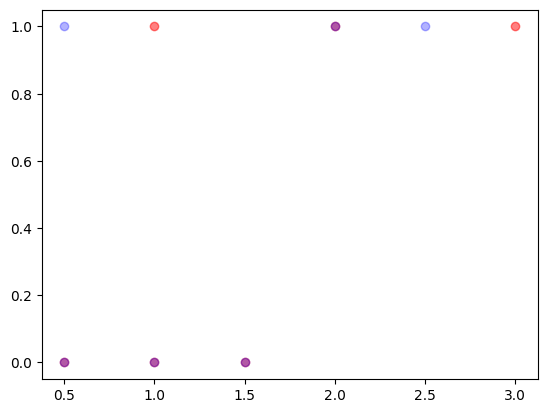

In [39]:
# plot each X_train feature and y_train
# code here
plt.scatter(X_train[:,0], y_train, c='r', alpha=0.5)
plt.scatter(X_train[:,1], y_train, c='b', alpha=0.3)
plt.show()


In [40]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


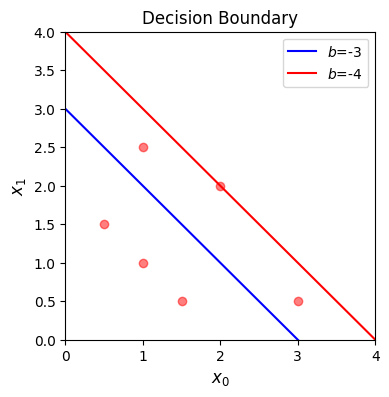

In [44]:
import matplotlib.pyplot as plt

# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c='b', label="$b$=-3")
ax.plot(x0,x1_other, c='r', label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
# plot_data(X_train,y_train,ax)
plt.scatter(X_train[:,0], X_train[:,1], c='r', alpha=0.5)
# plt.scatter(X_train[:,1], y_train, c='b', alpha=0.3)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [45]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


In [46]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw

In [47]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


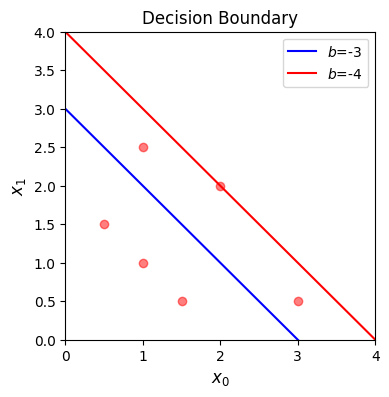

In [50]:
import matplotlib.pyplot as plt

# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c='b', label="$b$=-3")
ax.plot(x0,x1_other, c='r', label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
# plot_data(X_train,y_train,ax)
plt.scatter(X_train[:,0], X_train[:,1], c='r', alpha=0.5)
# plt.scatter(X_train[:,1], y_train, c='b', alpha=0.3)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [48]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


In [49]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.281 5.078], b:-14.222409982019837


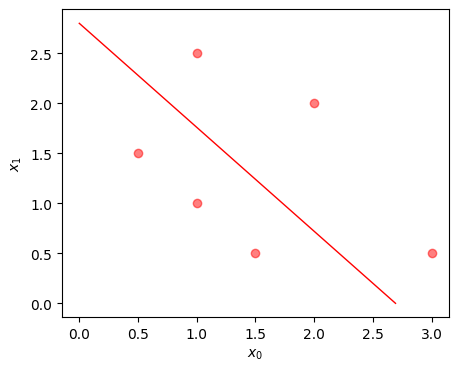

In [53]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

plt.scatter(X_train[:,0], X_train[:,1], c='r', alpha=0.5)


ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c='r', lw=1)
plt.show()

In [56]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

In [55]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)


print("Accuracy on training set:", lr_model.score(X, y))

Prediction on training set: [0 0 0 1 1 1]
Accuracy on training set: 1.0
